# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pulsar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pulsar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pulsar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pulsar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.

df = pd.read_csv("data/20-newsgroups.csv")

# 2. Print the shape

df.shape


(11314, 4)

In [3]:
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [4]:
# 3. Inspect / remove nulls and duplicates

df.isnull().sum()
# no nulls

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [5]:
df.duplicated().sum()

# no duplicates

0

In [6]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
sci.space                   593
comp.windows.x              593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

In [7]:
df.topic_category.value_counts(normalize=True)

rec.sport.hockey            0.053032
soc.religion.christian      0.052943
rec.motorcycles             0.052855
rec.sport.baseball          0.052766
sci.crypt                   0.052590
rec.autos                   0.052501
sci.med                     0.052501
sci.space                   0.052413
comp.windows.x              0.052413
sci.electronics             0.052236
comp.os.ms-windows.misc     0.052236
comp.sys.ibm.pc.hardware    0.052148
misc.forsale                0.051706
comp.graphics               0.051617
comp.sys.mac.hardware       0.051087
talk.politics.mideast       0.049850
talk.politics.guns          0.048259
alt.atheism                 0.042425
talk.politics.misc          0.041100
talk.religion.misc          0.033322
Name: topic_category, dtype: float64

In [8]:
# first make everything lower
# second remove punctuation for a space
# third add a space to the begining and end of the text
# fourth remove stop words

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [9]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def all_lower(text):
    
    return text.lower()

# could break up into multiple lines for better understanding

all_lower(test_string)


'this is a sentence with lots of caps.'

In [10]:
# 2. Make a function that removes all punctuation. 


test_string = "This is a sentence! 50 With lots of punctuation??? & other #things. won't"

def remove_punctuation(text):
    
    return (re.sub(r'[^\w\s]',' ',text))

remove_punctuation(test_string)

# I assume we want to keep the numbers

# maybe replace punctuation with a whitespace so that it works better with stop words
# will be a bit harder to read but we can maybe trim those white spaces

# this is so we can build a coherent pipeline that works in tandem and not against each other

# maybe have 2 remove punctuation functions


'This is a sentence  50 With lots of punctuation      other  things  won t'

In [11]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
stopwords_no_punc = []

# replace is not inplace

# also maybe append to the already existing list instead of making a new one for redundancy protection

for w in stopwords:
    
    temp = w.replace("'", "")
    stopwords_no_punc.append(temp)
    
    if(temp not in stopwords):
        stopwords.append(temp)
        
        
# alternatively we can replace ' with an empty space instead of nothing as the stop words
# do contain the ending of various contractions
# it has t and won
# for if won't becomes won t
# instead of wont

# could also do a check if ' is even in the word

In [13]:
stopwords_no_punc

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [14]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# 3. Make a function that removes all stopwords.

test_string = "This is a sentence! With some different stopwords i have added in here. won't won t wont"

def remove_stopwords (text):
    
# Break the sentence down into a list of words
    words = word_tokenize(text)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    text = ' '.join(valid_words)

    return text



remove_stopwords(test_string)

# This was not removed because the text was not made lowercase

# part of the reason why I like "" as opposed to '' is for contractions
# " " still has some problems though

# not sure why we get wo n't

"This sentence ! With different stopwords added . wo n't"

In [16]:
stop_words = set(stopwords)

In [17]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'arent',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'couldnt',
 'd',
 'did',
 'didn',
 "didn't",
 'didnt',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doesnt',
 'doing',
 'don',
 "don't",
 'dont',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'hadnt',
 'has',
 'hasn',
 "hasn't",
 'hasnt',
 'have',
 'haven',
 "haven't",
 'havent',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'isnt',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'mightnt',
 'more',
 'most',
 'mustn',
 "mustn't",
 'mustnt',
 'my',
 'myself',
 'needn',
 "needn't",
 'neednt',
 'no',
 'nor',
 'not',
 'no

In [18]:
test_string = "This is a sentence! With some different stopwords i have added in here. won't won t wont"

#stop_words = set(stopwords.words('english'))

# changing is done earlier



def remove_stopwords_alt (text):
    
    text = " " + text + " "
    
    # is this faster than takenize?
    
    for word in stop_words:
        text = text.replace(f" {word} ", ' ')


    return text



remove_stopwords_alt(test_string)

# I need to make sure that the text starts and ends with a space so that stopwords are removed

# also this removing of stop words should be done after most punctuation but not all

# because won't which is a stop word will become wont which is not a stop word

# unless we remove the punctuation from the list of stop words as well

# This was not removed becasue the text was not made lowercase

' This sentence! With different stopwords added here. '

In [19]:
#chars = r"[\.!?'[\]/]"
#descriptions = descriptions.str.replace(chars, '', regex=True)

# using regex and replace together

In [20]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'


# Break words into their stem words

def stem_words(text):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(text)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    text = ' '.join(valid_words)

    return text


stem_words(test_string)


# maybe try lemmatizing aswell


'I play and start play with player and we all love to play with play'

In [21]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.


test_string = "I played and started playing with players and we all love to play with plays. I won't wont won t # &"


def clean_text_pipeline(input_string):
    #input_string = " " + input_string + " "
    #print(input_string)
    input_string = all_lower(input_string)
    #print(input_string)
    
    input_string = remove_stopwords_alt(input_string)    
    #print(input_string)
    
    input_string = remove_punctuation(input_string)
    #print(input_string)
    #input_string = stem_words(input_string)
    #input_string = lem_with_pos_tag(input_string)
    
    
    return input_string


clean_text_pipeline(test_string)
#clean_text_pipeline(test_string)

# when using alt I am not sure why t is in the final string when t is a stop word

# but the non alt works fine here but not in other cases

# had some difficulty with this

# needed to move remove stopwords to right after lower and before punctuation
# not sure why I had to as the other order should have worked fine

' played started playing players love play plays      '

In [22]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df["message_clean"] = df["message"].apply(clean_text_pipeline)


In [23]:
df.head()
# \ are not removed from the messages
# that should be fixed
# need to change up the remove puntcuation function
# or maybe it is just space formatting

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,from lerxst wam umd edu where s thing \r\ns...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,from guykuo carson u washington edu guy kuo...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,from twillis ec ecn purdue edu thomas e wil...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,from jgreen amber joe green \r\nsubject re...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,from jcm head cfa harvard edu jonathan mcdo...


In [24]:
print("ORIGINAL TEXT:", df['message'][0])
print("CLEANDED TEXT:", df['message_clean'][0])

ORIGINAL TEXT: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





CLEANDED TEXT:  from  lerxst wam umd edu  where s thing 
subject  car this  
nntp posting host  rac3 wam umd edu
organization  university maryland  college park
lines  15

 wondering anyone could enlighten car saw
the day  2 door sports car  looked late 60s 
earl

In [25]:
# copied from lecture

# Lemmatize words with pos-tags

def convert_pos(pos):
    if pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def lem_with_pos_tag(a_string):
    # Initalize our Lemmer
    lemmatizer = WordNetLemmatizer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Get the word and pos_tag for each of the words. 
    tagged_words = nltk.pos_tag(words)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in tagged_words:
        
        # The word is the first element in the tuple
        the_word = word[0]
        
        # The pos_tag is the second element in the tuple
        the_pos_tag = word[1]
        
        # Convert the pos_tag into the format the lemmatizer accepts
        the_pos_tag = convert_pos(the_pos_tag)
        
        # Lemmatize the word with the pos_tag
        lemmed_word = lemmatizer.lemmatize(the_word, the_pos_tag)
        
        # Append stemmed word to our valid_words
        valid_words.append(lemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

a_sentence = 'I played and started playing with players and we all love to play with plays'
lem_with_pos_tag(a_sentence)


'I play and start play with player and we all love to play with play'

In [26]:
another_sentence = 'This is because she wanted to go outside with her friends and play basketball.'
lem_with_pos_tag(another_sentence)
# why did is become be

'This be because she want to go outside with her friend and play basketball .'

In [27]:

test_string = "I played and started playing with players and we all love to play with plays. I won't wont won t # &"


def clean_text_pipeline_bugged(input_string):
    #input_string = " " + input_string + " "
    print(input_string)
    input_string = all_lower(input_string)
    print(input_string)
    
      
    
    
    input_string = remove_punctuation(input_string)
    print(input_string)
    #input_string = stem_words(input_string)
    #input_string = lem_with_pos_tag(input_string)
    input_string = remove_stopwords_alt(input_string)  
    
    
    return input_string


test_string = clean_text_pipeline_bugged(test_string)
clean_text_pipeline_bugged(test_string)

I played and started playing with players and we all love to play with plays. I won't wont won t # &
i played and started playing with players and we all love to play with plays. i won't wont won t # &
i played and started playing with players and we all love to play with plays  i won t wont won t    
 played started playing players love play plays  won     
 played started playing players love play plays  won     
 played started playing players love play plays  won     


'  played started playing players love play plays       '

In [28]:
# not sure what is happening here

# doing a second cleaning fixes it but that should not be needed

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [29]:
# 1. Define your `X` and `y` data. 

X = df['message_clean'].values

y = df['topic_category'].values

In [30]:
# this part is done differently in the lecture than what is asked.
# the lecture splits the data first and then fits and transforms
# here we are asked to do this before splitting

In [31]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

# I assume count vectorizer is bag of words?

# Initialize our vectorizer
vectorizer = TfidfVectorizer()




#vectorizer = CountVectorizer()

# an attempt

# gets 88% which is less that tfidf






In [32]:
# 3. Fit your vectorizer using your X data

# This makes your vocab matrix
vectorizer.fit(X)
# got a lower not found error
# sometimes I get an error sometimes not



TfidfVectorizer()

In [33]:
# 4. Transform your X data using your fitted vectorizer. 

X_copy = X
# keeping a copy

# This transforms your documents into vectors.
X = vectorizer.transform(X)






In [34]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X.shape, type(X))

# we have 130099 features/columns/words

(11314, 130099) <class 'scipy.sparse.csr.csr_matrix'>


# Split your data into Training and Testing data. 

In [35]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [36]:
features = vectorizer.get_feature_names()
weights = vectorizer.idf_

print(len(features), len(weights))

df_idf = pd.DataFrame.from_dict( {'feature': features, 'idf': weights})

df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf

# not for CountVectorizer

130099 130099


,feature,idf
46782,deum,9.640737
58633,genial,9.640737
58641,genlock,9.640737
108474,sngi,9.640737
108477,snick,9.640737
...,...,...
99716,re,1.381667
90374,organization,1.040307
76027,lines,1.003275
56977,from,1.000000


In [37]:
X_train[0]

<1x130099 sparse matrix of type '<class 'numpy.float64'>'
	with 45 stored elements in Compressed Sparse Row format>

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [38]:
# 1. Initalize an empty model. 


model = MultinomialNB(alpha=.05)

In [39]:
# Fit our model with our training data.


model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [40]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

In [41]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

# less accurate than the one from class


Model Accuracy: 0.909854


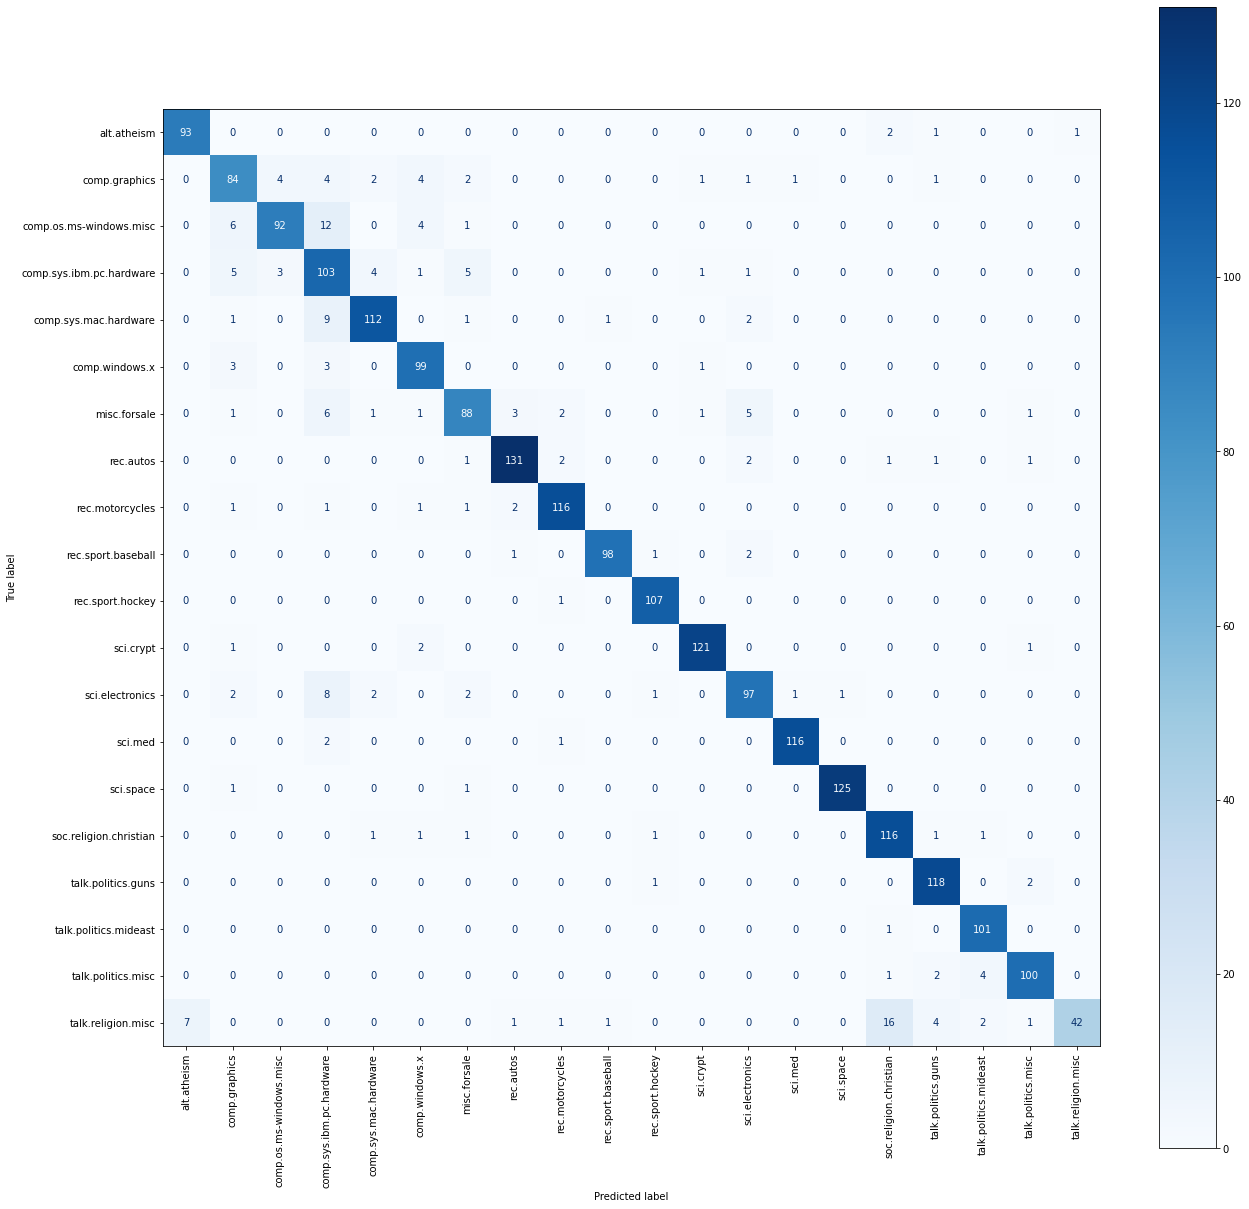

In [42]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [43]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.96      0.94        97
           comp.graphics       0.80      0.81      0.80       104
 comp.os.ms-windows.misc       0.93      0.80      0.86       115
comp.sys.ibm.pc.hardware       0.70      0.84      0.76       123
   comp.sys.mac.hardware       0.92      0.89      0.90       126
          comp.windows.x       0.88      0.93      0.90       106
            misc.forsale       0.85      0.81      0.83       109
               rec.autos       0.95      0.94      0.95       139
         rec.motorcycles       0.94      0.95      0.95       122
      rec.sport.baseball       0.98      0.96      0.97       102
        rec.sport.hockey       0.96      0.99      0.98       108
               sci.crypt       0.97      0.97      0.97       125
         sci.electronics       0.88      0.85      0.87       114
                 sci.med       0.98      0.97      0.98       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [44]:
my_sentence = "Second AmEndment # firearms"

# just second amendment is enough to get a 45%

# 1. Apply the text pipeline to your sentence

my_sentence = clean_text_pipeline(my_sentence)

print(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

X = vectorizer.transform([my_sentence])

# described a little differently than in the lecture

# 3. Use the model to predict your new `X`. 

print(model.predict(X))


# 4. Print the prediction

# Print the predicted probabilies for each class
pp = model.predict_proba(X)
# Print probabilities for that predicition
for class_name, percentage in zip(model.classes_, pp.round(3)[0]):
    print(class_name, percentage )


 second amendment   firearms 
['talk.politics.guns']
alt.atheism 0.001
comp.graphics 0.001
comp.os.ms-windows.misc 0.001
comp.sys.ibm.pc.hardware 0.002
comp.sys.mac.hardware 0.001
comp.windows.x 0.001
misc.forsale 0.001
rec.autos 0.001
rec.motorcycles 0.001
rec.sport.baseball 0.002
rec.sport.hockey 0.002
sci.crypt 0.064
sci.electronics 0.003
sci.med 0.003
sci.space 0.001
soc.religion.christian 0.002
talk.politics.guns 0.892
talk.politics.mideast 0.007
talk.politics.misc 0.01
talk.religion.misc 0.003


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [45]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')


df.shape

(86460, 3)

In [46]:
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [47]:
df.isnull().sum()

Party     0
Handle    0
Tweet     0
dtype: int64

In [48]:
df.duplicated().sum()

57

In [49]:
print(df.shape, 'before dropping dupes')


df = df.drop_duplicates()

print(df.shape, 'after dropping dupes')

(86460, 3) before dropping dupes
(86403, 3) after dropping dupes


In [50]:
df.Party.value_counts()

Republican    44362
Democrat      42041
Name: Party, dtype: int64

In [51]:
df.Handle.value_counts()

RepStephenLynch    200
RepKClark          200
ToddRokita         200
rep_stevewomack    200
SpeakerRyan        200
                  ... 
RepVisclosky       197
RepBillFlores      195
repdonnaedwards    195
TulsiPress         192
collinpeterson      80
Name: Handle, Length: 433, dtype: int64

In [52]:
df.Tweet.value_counts()

# some tweets are repeated.
#This shoukd probably be removed

RT @RepDanKildee: Four years later, Flint families are still recovering from the water crisis and having to use filters &amp; bottled water. In…    31
RT @RepTimWalz: 2 million people will have their access to food threatened if the @HouseGOP passes their hyper-partisan #FarmBill.\n\nThat’s…       28
RT @RepCummings: It’s time to send a clear message on the #2020Census that #EveryoneCounts. An undercount will hurt people in red states to…        20
RT @RepLloydDoggett: Since 2006, the average cost for a year of medication for someone with a chronic disease has more than doubled to over…        20
RT @RepLoisFrankel: #EqualPayDay recognizes that women must work 3 extra months just to earn the same pay as men! Closing the #GenderWageGa…        19
                                                                                                                                                    ..
...as well as H.R. 1171, the ALS Disability Insurance Access Act of 2017, legislation I cospon

In [53]:
df["Tweet_clean"] = df["Tweet"].apply(clean_text_pipeline)

In [54]:
df.head()

,Party,Handle,Tweet,Tweet_clean
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote savetheinternet pro...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resident alta vi...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted hurrican...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting repdarrensoto th...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season starts june 1...


In [55]:
print("ORIGINAL TEXT:", df['Tweet'][0])
print("CLEANDED TEXT:", df['Tweet_clean'][0])

ORIGINAL TEXT: Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
CLEANDED TEXT:  today  senate dems vote  savetheinternet  proud support similar  netneutrality legislation house  https   t co n3tggdlu1l 


In [56]:
# 1. Define your `X` and `y` data. 

X = df['Tweet_clean'].values

y = df['Party'].values

In [57]:
# Initialize our vectorizer
vectorizer = TfidfVectorizer()


In [58]:
vectorizer.fit(X)

TfidfVectorizer()

In [59]:
X = vectorizer.transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [61]:
features = vectorizer.get_feature_names()
weights = vectorizer.idf_

print(len(features), len(weights))

df_idf = pd.DataFrame.from_dict( {'feature': features, 'idf': weights})

df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf


126325 126325


,feature,idf
57382,irritants,11.673642
72514,miswmq7vlh,11.673642
72528,mitigación,11.673642
72527,mitiga,11.673642
72526,miti,11.673642
...,...,...
16463,amp,3.304369
106941,today,3.299973
95645,rt,2.516597
53343,https,1.272034


In [62]:
model = MultinomialNB(alpha= 0.15, fit_prior=True, class_prior=None)

# 0.15 gives 82%

# pretty hard to get above 82%

# not alot I can tune

In [63]:
model.fit(X_train, y_train)

MultinomialNB(alpha=0.15)

In [64]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

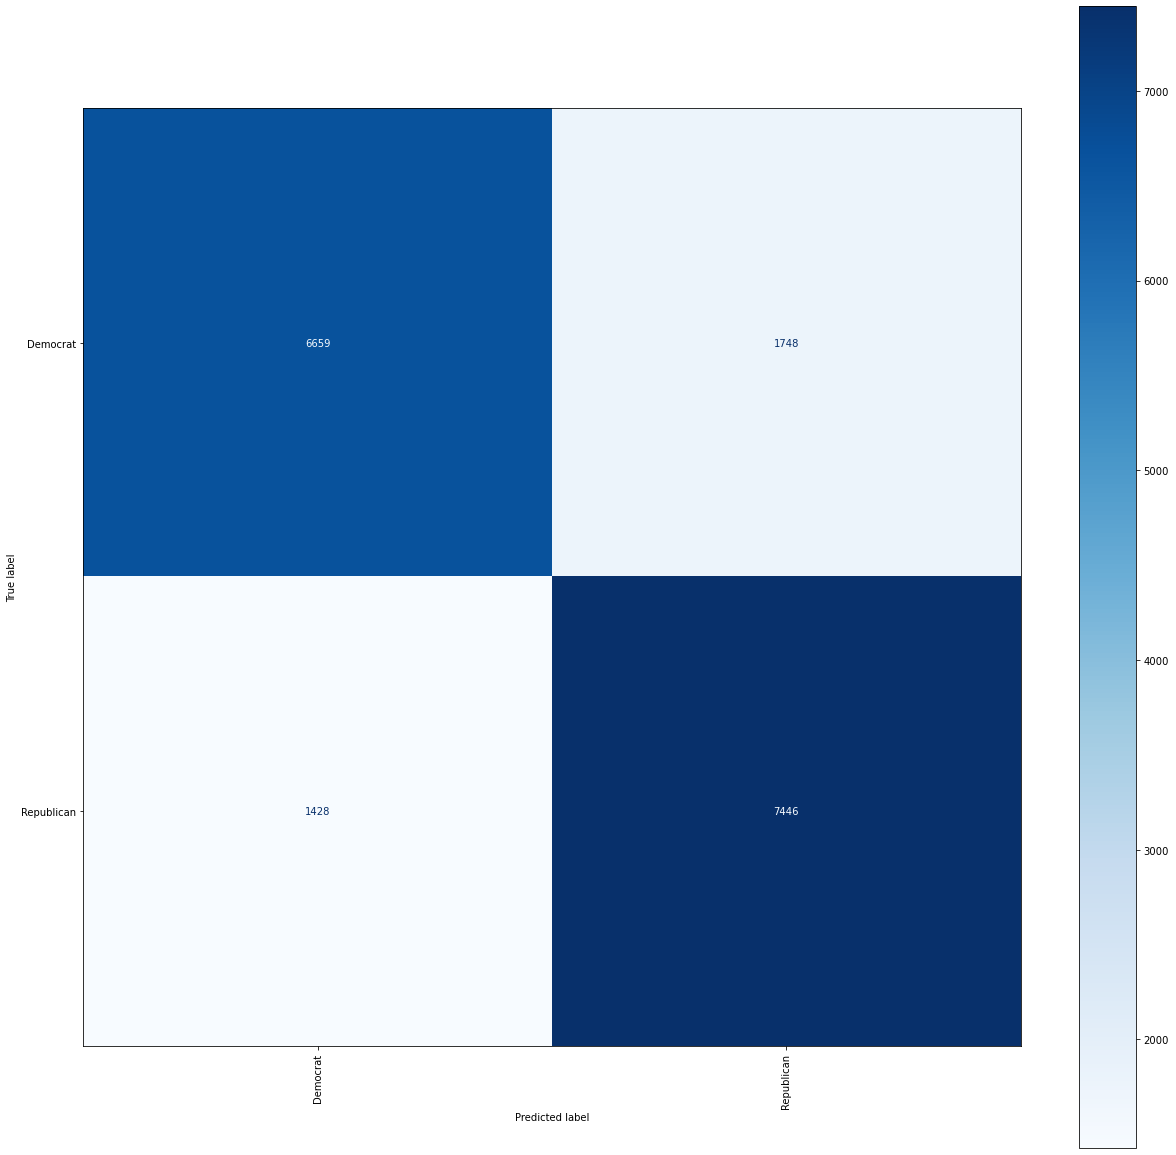

In [65]:

fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [66]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.82      0.79      0.81      8407
  Republican       0.81      0.84      0.82      8874

    accuracy                           0.82     17281
   macro avg       0.82      0.82      0.82     17281
weighted avg       0.82      0.82      0.82     17281



In [67]:
# tried random forest
# takes too long

# tried the raw tweets
# did not seem to significantly affect the score